# Linear Regression
# submitted by Harsh Srivastava
# 117CS0755

## importing libraries

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import sklearn
import os

# !pip install numpy pandas matplotlib xlrd

Populating the interactive namespace from numpy and matplotlib


## loading the dataset

In [16]:
def create_dataset() :
    
    dataset_path = None
    for root, dirs, files in os.walk(".", topdown=False) :
        for name in files:
            if name.endswith('Real_estate_valuation.xlsx') :
                dataset_path = os.path.join(root, name)
                break
        if dataset_path != None :
            break
            
    dataset = pd.read_excel(dataset_path)
    dataset = dataset.dropna()
    dataset = pd.concat([pd.Series(1, index=dataset.index, name='ones'), dataset], axis=1)
    print("\nhead of dataset")
    dataset.head()
    return dataset

## taking dependent and independent variables

In [3]:
# features = ['ones', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
# #features = ['X2 house age']
def X_y_regresssion(dataset, features):
    X = dataset[features].values
    y = dataset['Y house price of unit area'].values
    m, n = X.shape
    print("\ndependent and independent variables")
    print(X)
    print(y)
    print("{} {}".format(m, n))
    return X, y, m, n

## normalizing training set

In [4]:
def normalized_X(X) :
    for i in range(1, X.shape[1]):
        X[i-1] = X[i-1]/np.max(X[i-1])
        print("\nnormalized independent matrix")
        print(X)
        return X

## splitting into training and testing dataset

In [5]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    
    print("\nsplit training and test sets")

    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    m_train = X_train.shape[0]
    m_test = X_test.shape[0]

    return X_train, X_test, y_train, y_test, m_train, m_test

## calculating parameters for regression

In [6]:
def regression_parameter_B(X, y) :
    B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    print("\nregression parameter")
    print(B)
    return B

## predicting values for test dataset

In [7]:
def predictions(X, B) :
    y_pred = np.dot(X, B)
    print("\npredicted values on test set")
    print(y_pred)
    return y_pred

## calculating RMSE

In [8]:
def root_mean_squared_error(y, y_pred, m) :
    RMSE = np.sqrt(np.sum((y - y_pred) ** 2) / m)
    print("\nroot mean squared error")
    print(RMSE)
    return RMSE

## scatter plot actual vs predicted values

In [9]:
def plot_actual_vs_pred_scatter(y, y_pred, m) :
    print("\nplotting actual vs predicted scatter")
    plt.figure()
    plt.scatter(x = list(range(0, m)),y = y, color='blue')
    plt.scatter(x = list(range(0, m)), y = y_pred, color='black')
    plt.show()

## plotting actual vs predicted

In [10]:
def plot_actual_vs_pred(y, y_pred, m) :
    print("\nplotting actual vs predicted")
    plt.figure()
    plt.plot(list(range(0, m)),y, color='green')
    plt.plot(list(range(0, m)), y_pred, color='red')
    plt.show()

## function for regression

In [11]:
def linear_regression(features) :
    dataset = create_dataset()
    
    X, y, m, n = X_y_regresssion(dataset, features)
    
    X = normalized_X(X)
    
    X_train, X_test, y_train, y_test, m_train, m_test = split_train_test(X, y)
    
    B = regression_parameter_B(X_train, y_train)
    
    y_test_pred = predictions(X_test, B)
    
    RMSE = root_mean_squared_error(y_test, y_test_pred, m_test)
    
    return y_test, y_test_pred, m_test

## single linear regression

In [12]:
y_test, y_test_pred, m_test = linear_regression(features = ['ones', 'X2 house age'])


head of dataset

dependent and independent variables
[[ 1.  32. ]
 [ 1.  19.5]
 [ 1.  13.3]
 [ 1.  13.3]
 [ 1.   5. ]
 [ 1.   7.1]
 [ 1.  34.5]
 [ 1.  20.3]
 [ 1.  31.7]
 [ 1.  17.9]
 [ 1.  34.8]
 [ 1.   6.3]
 [ 1.  13. ]
 [ 1.  20.4]
 [ 1.  13.2]
 [ 1.  35.7]
 [ 1.   0. ]
 [ 1.  17.7]
 [ 1.  16.9]
 [ 1.   1.5]
 [ 1.   4.5]
 [ 1.  10.5]
 [ 1.  14.7]
 [ 1.  10.1]
 [ 1.  39.6]
 [ 1.  29.3]
 [ 1.   3.1]
 [ 1.  10.4]
 [ 1.  19.2]
 [ 1.   7.1]
 [ 1.  25.9]
 [ 1.  29.6]
 [ 1.  37.9]
 [ 1.  16.5]
 [ 1.  15.4]
 [ 1.  13.9]
 [ 1.  14.7]
 [ 1.  12. ]
 [ 1.   3.1]
 [ 1.  16.2]
 [ 1.  13.6]
 [ 1.  16.8]
 [ 1.  36.1]
 [ 1.  34.4]
 [ 1.   2.7]
 [ 1.  36.6]
 [ 1.  21.7]
 [ 1.  35.9]
 [ 1.  24.2]
 [ 1.  29.4]
 [ 1.  21.7]
 [ 1.  31.3]
 [ 1.  32.1]
 [ 1.  13.3]
 [ 1.  16.1]
 [ 1.  31.7]
 [ 1.  33.6]
 [ 1.   3.5]
 [ 1.  30.3]
 [ 1.  13.3]
 [ 1.  11. ]
 [ 1.   5.3]
 [ 1.  17.2]
 [ 1.   2.6]
 [ 1.  17.5]
 [ 1.  40.1]
 [ 1.   1. ]
 [ 1.   8.5]
 [ 1.  30.4]
 [ 1.  12.5]
 [ 1.   6.6]
 [ 1.  35.5]
 [ 1.  32.


plotting actual vs predicted scatter


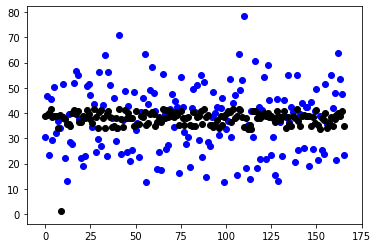


plotting actual vs predicted


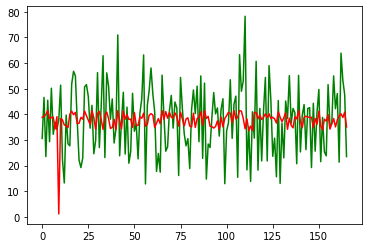

In [13]:
plot_actual_vs_pred_scatter(y_test, y_test_pred, m_test)
plot_actual_vs_pred(y_test, y_test_pred, m_test)

## multiple linear regression

In [14]:
y_test, y_test_pred, m_test = linear_regression(features = ['ones', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])


head of dataset

dependent and independent variables
[[1.00000000e+00 2.01291667e+03 3.20000000e+01 ... 1.00000000e+01
  2.49829800e+01 1.21540240e+02]
 [1.00000000e+00 2.01291667e+03 1.95000000e+01 ... 9.00000000e+00
  2.49803400e+01 1.21539510e+02]
 [1.00000000e+00 2.01358333e+03 1.33000000e+01 ... 5.00000000e+00
  2.49874600e+01 1.21543910e+02]
 ...
 [1.00000000e+00 2.01325000e+03 1.88000000e+01 ... 7.00000000e+00
  2.49792300e+01 1.21539860e+02]
 [1.00000000e+00 2.01300000e+03 8.10000000e+00 ... 5.00000000e+00
  2.49667400e+01 1.21540670e+02]
 [1.00000000e+00 2.01350000e+03 6.50000000e+00 ... 9.00000000e+00
  2.49743300e+01 1.21543100e+02]]
[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9


plotting actual vs predicted scatter


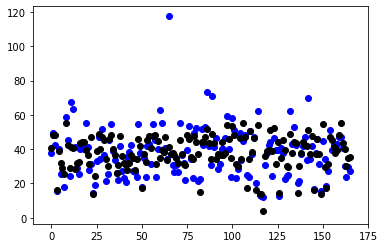


plotting actual vs predicted


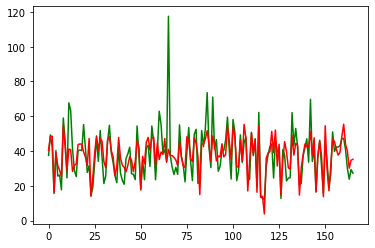

In [15]:
plot_actual_vs_pred_scatter(y_test, y_test_pred, m_test)
plot_actual_vs_pred(y_test, y_test_pred, m_test)